In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
from scipy import stats

import matplotlib.pyplot as plt
import pydotplus
from matplotlib import rcParams
import seaborn as sb

from collections import Counter

In [2]:
df1 = pd.read_csv('OriginalImportedFile_enc_Normal.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 20 columns):
c_AreaCode               4617 non-null int64
c_InternationalPlan      4617 non-null int64
c_State                  4617 non-null int64
c_VMailPlan              4617 non-null int64
q_AccountLength          4617 non-null int64
q_CustServCalls          4617 non-null int64
q_DayCalls               4617 non-null int64
q_DayCharge              4617 non-null float64
q_DayMins                4617 non-null float64
q_EveCalls               4617 non-null int64
q_EveCharge              4617 non-null float64
q_EveMins                4617 non-null float64
q_InternationalCharge    4617 non-null float64
q_InternationalMins      4617 non-null float64
q_Internationalcalls     4617 non-null int64
q_NightCalls             4617 non-null int64
q_NightCharge            4617 non-null float64
q_NightMins              4617 non-null float64
q_VMailMessage           4617 non-null int64
y_Churn               

In [4]:
#df1.c_AreaCode = df1.c_AreaCode.astype("int64")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 20 columns):
c_AreaCode               4617 non-null int64
c_InternationalPlan      4617 non-null int64
c_State                  4617 non-null int64
c_VMailPlan              4617 non-null int64
q_AccountLength          4617 non-null int64
q_CustServCalls          4617 non-null int64
q_DayCalls               4617 non-null int64
q_DayCharge              4617 non-null float64
q_DayMins                4617 non-null float64
q_EveCalls               4617 non-null int64
q_EveCharge              4617 non-null float64
q_EveMins                4617 non-null float64
q_InternationalCharge    4617 non-null float64
q_InternationalMins      4617 non-null float64
q_Internationalcalls     4617 non-null int64
q_NightCalls             4617 non-null int64
q_NightCharge            4617 non-null float64
q_NightMins              4617 non-null float64
q_VMailMessage           4617 non-null int64
y_Churn               

In [5]:
# Categorise varibales
CatVarList = ['c_AreaCode', 'c_InternationalPlan', 'c_Phone', 'c_State','c_VMailPlan']
ConVarList = ['q_AccountLength', 'q_CustServCalls', 'q_DayCalls', 'q_DayCharge',
              'q_DayMins', 'q_EveCalls', 'q_EveCharge', 'q_EveMins',
              'q_InternationalCharge', 'q_InternationalMins', 'q_Internationalcalls',
              'q_NightCalls', 'q_NightCharge', 'q_NightMins', 'q_VMailMessage']
OutValList = ['y_Churn']

## Checking normality of varibales - to understand  the requirment of tranforming the varibales

In [6]:
# Check distribution of continous variables - All values between + and -1, establishes reasonable normality
ConVarStats = df1[ConVarList].agg(['skew','kurtosis','std','mean','min','median','max'])
print(ConVarStats)

          q_AccountLength  q_CustServCalls  q_DayCalls  q_DayCharge  \
skew             0.106248         1.046800   -0.081013    -0.002952   
kurtosis        -0.092552         1.515026    0.196147    -0.042264   
std             39.597194         1.307019   19.883027     9.177145   
mean           100.645224         1.567035  100.054364    30.676576   
min              1.000000         0.000000    0.000000     0.000000   
median         100.000000         1.000000  100.000000    30.600000   
max            243.000000         9.000000  165.000000    59.760000   

           q_DayMins  q_EveCalls  q_EveCharge   q_EveMins  \
skew       -0.002948   -0.017554    -0.005252   -0.005280   
kurtosis   -0.042399    0.135980     0.043522    0.043630   
std        53.983540   19.821314     4.297332   50.557001   
mean      180.447152  100.179770    17.036703  200.429088   
min         0.000000    0.000000     0.000000    0.000000   
median    180.000000  101.000000    17.070000  200.800000   
max 

In [7]:
# The P value > 0 for the varible to be normal. Some varibale are not normal. We can look at 
#log transforming those varibales before being fed into the algorithms

NormailityStat = pd.DataFrame()
for i in ConVarList:
    print(i,stats.shapiro(df1[[i]]))


q_AccountLength (0.9982630610466003, 5.487639282364398e-05)
q_CustServCalls (0.8793798685073853, 0.0)
q_DayCalls (0.9985260963439941, 0.00029281608294695616)
q_DayCharge (0.9996636509895325, 0.6660524606704712)
q_DayMins (0.9996637105941772, 0.666138768196106)
q_EveCalls (0.9989724159240723, 0.00631301524117589)
q_EveCharge (0.99959397315979, 0.4745479226112366)
q_EveMins (0.9995930790901184, 0.472330242395401)
q_InternationalCharge (0.9937570095062256, 2.668885620317474e-13)
q_InternationalMins (0.9937874674797058, 2.932173546934397e-13)
q_Internationalcalls (0.9017679691314697, 0.0)
q_NightCalls (0.9994060397148132, 0.1446988731622696)
q_NightCharge (0.9996942281723022, 0.751190185546875)
q_NightMins (0.9996875524520874, 0.7330653667449951)
q_VMailMessage (0.6123892068862915, 0.0)


## Box plot of all the varibles - to analyse the possibility of scaling

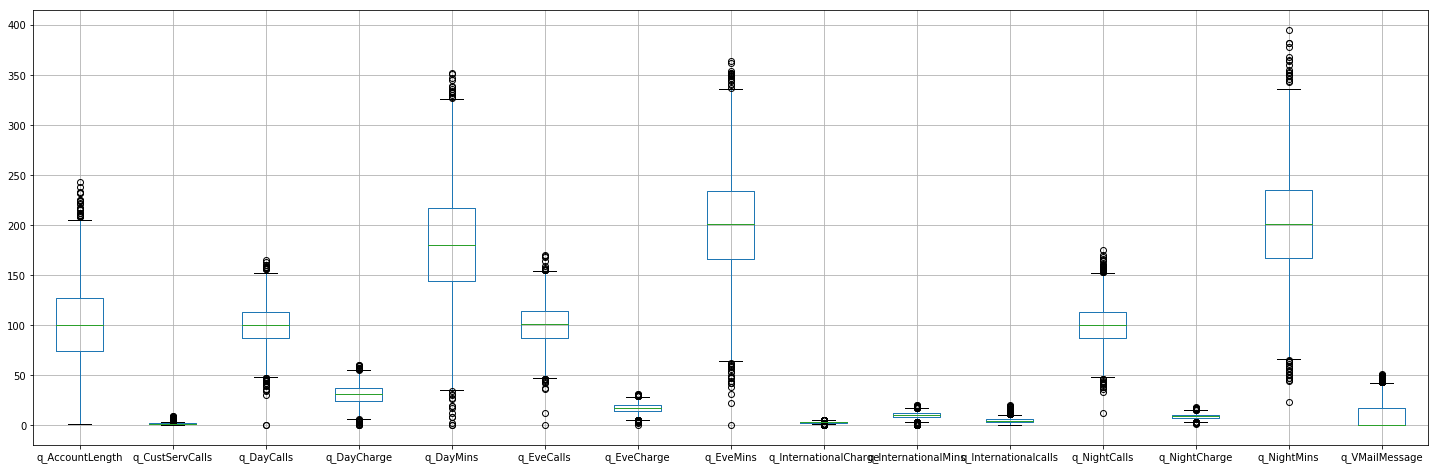

In [8]:
# the magnitude of variations between varibales is  huge. So a fit case for scaling of variables. TBD later
rcParams['figure.figsize'] =25,8
df1[ConVarList].boxplot()


## Basic Pie chart of outcome variable

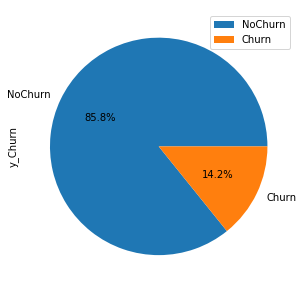

In [9]:
rcParams['figure.figsize'] =10,5
df1.y_Churn.value_counts(sort=False).plot.pie(labels=["NoChurn","Churn"],legend = True, autopct='%1.1f%%',shadow=False)
plt.show()

## Analysing Account length

In [10]:
# Analysing Accounbt length
df1['q_AccountLength'].describe()

count    4617.000000
mean      100.645224
std        39.597194
min         1.000000
25%        74.000000
50%       100.000000
75%       127.000000
max       243.000000
Name: q_AccountLength, dtype: float64

In [18]:
# Converting Account length into 13 bins each of size 20 days. Check the frequency of each bin
custom_bucket_array = np.linspace(0, 260, 14)
df1['q_AccountLength_bins'] = pd.cut(df1['q_AccountLength'], custom_bucket_array)
Counter(df1['q_AccountLength_bins'])

Counter({Interval(120.0, 140.0, closed='right'): 697,
         Interval(100.0, 120.0, closed='right'): 887,
         Interval(80.0, 100.0, closed='right'): 893,
         Interval(60.0, 80.0, closed='right'): 709,
         Interval(140.0, 160.0, closed='right'): 378,
         Interval(160.0, 180.0, closed='right'): 219,
         Interval(40.0, 60.0, closed='right'): 425,
         Interval(0.0, 20.0, closed='right'): 93,
         Interval(20.0, 40.0, closed='right'): 204,
         Interval(180.0, 200.0, closed='right'): 80,
         Interval(200.0, 220.0, closed='right'): 21,
         Interval(220.0, 240.0, closed='right'): 10,
         Interval(240.0, 260.0, closed='right'): 1})

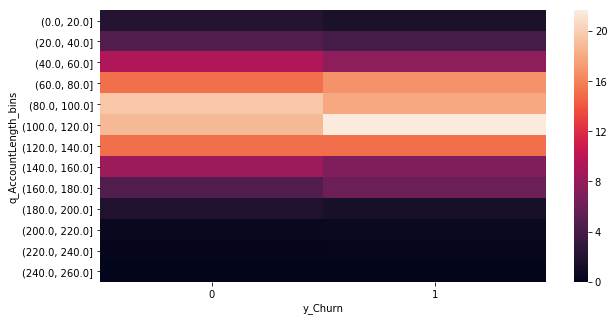

In [11]:
# Heat map of Churn Vs Account lenght
sb.heatmap(pd.crosstab(df1.q_AccountLength_bins, df1.y_Churn,normalize = 'columns').round(6)*100)


y_Churn                     0       1
q_AccountLength_bins                 
(0.0, 20.0]            1.7977  0.2166
(20.0, 40.0]           3.8553  0.5631
(40.0, 60.0]           8.1005  1.1046
(60.0, 80.0]          12.9738  2.3825
(80.0, 100.0]         16.7858  2.5558
(100.0, 120.0]        16.1360  3.0756
(120.0, 140.0]        12.9521  2.1442
(140.0, 160.0]         7.1908  0.9963
(160.0, 180.0]         3.8986  0.8447
(180.0, 200.0]         1.5378  0.1949
(200.0, 220.0]         0.3682  0.0866
(220.0, 240.0]         0.1733  0.0433
(240.0, 260.0]         0.0217  0.0000


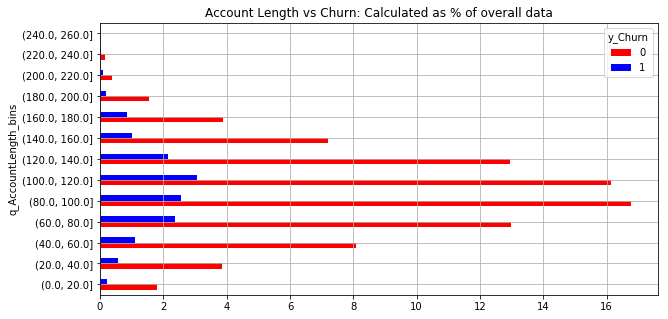

In [41]:
# Show the chrn has happened in for account lengths in durations 60 to 14 days. Higher churn is in range of 100-120 days.
Crosstab_AL = pd.crosstab(df1.q_AccountLength_bins, df1.y_Churn,normalize = 'all').round(6)*100
print(Crosstab_AL)
Crosstab_AL.plot(kind='barh', stacked=False, color=['red','blue'], grid=True, title="Account Length vs Churn: Calculated as % of overall data")

## Analyse Churn Vs Area code

y_Churn           0        1
c_AreaCode                  
0           25.1452  25.1524
1           50.0126  48.4756
2           24.8422  26.3720


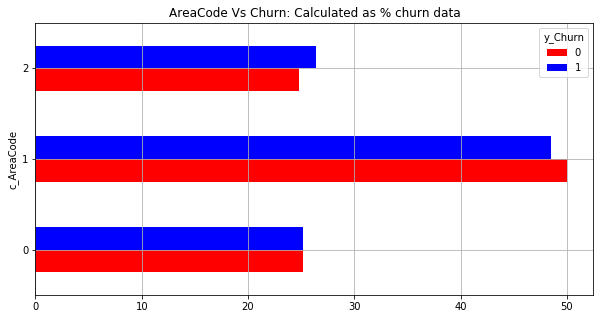

In [48]:
# For churn = True: The 48% were from 415 (1). 415 has higher % of churn
Crosstab_Area = pd.crosstab(df1.c_AreaCode, df1.y_Churn,normalize = 'columns').round(6)*100
print(Crosstab_Area)
Crosstab_Area.plot(kind='barh', stacked=False, color=['red','blue'], grid=True,title="AreaCode Vs Churn: Calculated as % churn data")

## Analyse International plan (Discothomous) and Churn data

y_Churn                   0        1
c_InternationalPlan                 
0                    93.436  71.6463
1                     6.564  28.3537


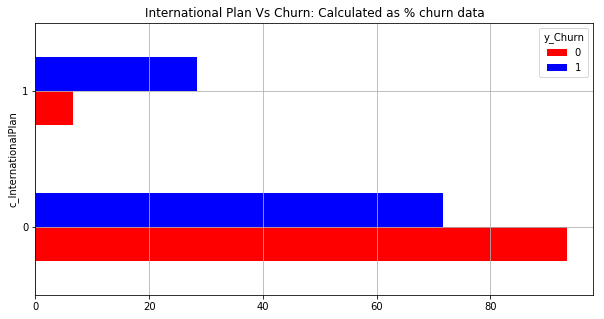

In [49]:
# For Churn = True, 71% dont have plan and 29% have Int Plan. Implies It should encorage people to take internatinal plan or give it for free
Crosstab_IntP =  pd.crosstab(df1.c_InternationalPlan, df1.y_Churn,  normalize = 'columns').round(6)*100
print(Crosstab_IntP)
Crosstab_IntP.plot(kind='barh', stacked=False, color=['red','blue'], grid=True,title="International Plan Vs Churn: Calculated as % churn data")

## Analyse Churn, State Wise

y_Churn       0       1
c_State                
0        1.6158  0.7622
1        2.6256  1.5244
2        1.5653  2.2866
3        1.8682  1.0671
4        0.7826  1.9817
5        2.0449  1.5244
6        1.9692  2.1341
7        1.8430  1.3720
8        1.8935  2.1341
9        1.8430  1.8293
10       1.6915  1.5244
11       1.8682  0.7622
12       1.4895  0.9146
13       2.4489  1.9817
14       1.8177  1.0671
15       1.9187  1.9817
16       1.9692  2.7439
17       1.9440  1.9817
18       1.6662  1.0671
19       2.0954  2.1341
20       1.8177  3.0488
21       1.9440  2.7439
22       2.0449  2.5915
23       2.3731  2.7439
24       1.8430  1.6768
25       1.8935  2.4390
26       1.8430  2.8963
27       1.7925  1.8293
28       1.8430  1.0671
29       1.8430  0.9146
30       2.0197  1.6768
31       2.0449  3.8110
32       1.9187  1.2195
33       1.8177  2.5915
34       2.2974  2.7439
35       2.3984  2.2866
36       1.6410  2.2866
37       2.2722  2.5915
38       1.5148  1.2195
39       2.0954 

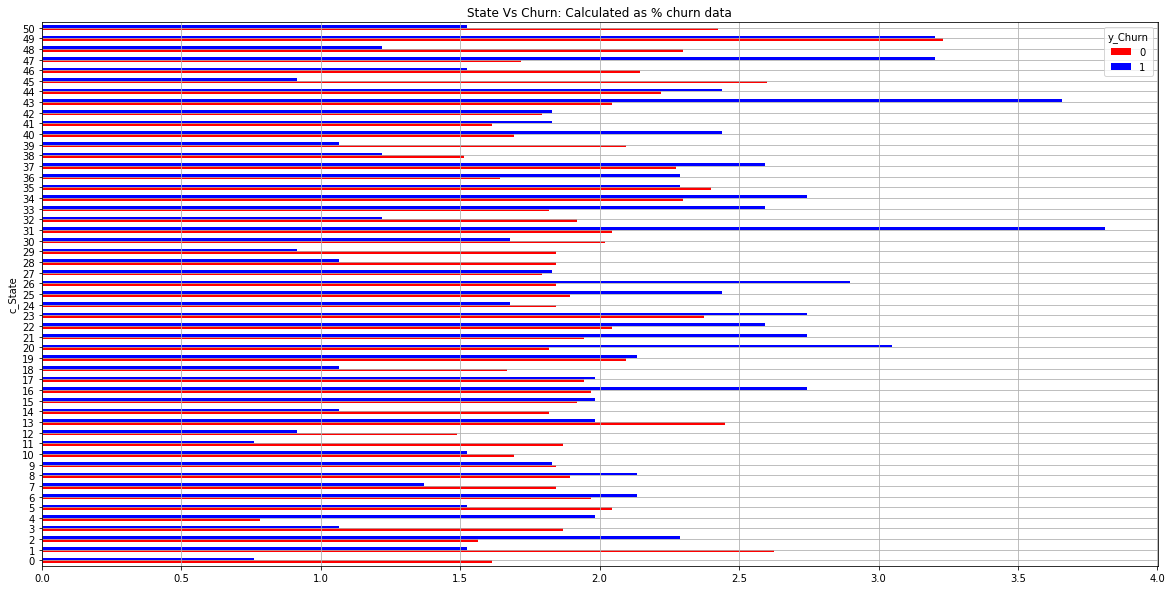

In [50]:
# For churn = True: quite a few states with high churn rate. Services to be reviewed in those states with 
# Churn Rate more than 2% and special care in states of with more than 3%
rcParams['figure.figsize'] =20,10
Crosstab_State =  pd.crosstab(df1.c_State, df1.y_Churn,normalize = 'columns').round(6)*100
print(Crosstab_State)
Crosstab_State.plot(kind='barh', stacked=False, color=['red','blue'], grid=True,title="State Vs Churn: Calculated as % churn data")

## Analyse Churn Vs Voice message plan

y_Churn            0        1
c_VMailPlan                  
0            71.2446  85.2134
1            28.7554  14.7866


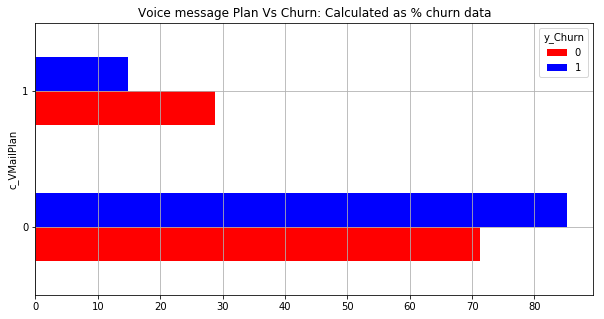

In [51]:
# For churn = True: People with no VM plan are 86% and with VM its 14% area of concern. 
# Implies They should sell more of Voice Message plan to reduce churn
rcParams['figure.figsize'] =10,5
Crosstab_VMPlan = pd.crosstab(df1.c_VMailPlan, df1.y_Churn,normalize = 'columns').round(6)*100
print(Crosstab_VMPlan)
Crosstab_VMPlan.plot(kind='barh', stacked=False, color=['red','blue'], grid=True,title="Voice message Plan Vs Churn: Calculated as % churn data")

## Voice mail, International plan Vs Churn

y_Churn                                0        1
c_VMailPlan c_InternationalPlan                  
0           0                    66.7508  63.4146
            1                     4.4938  21.7988
1           0                    26.6852   8.2317
            1                     2.0702   6.5549


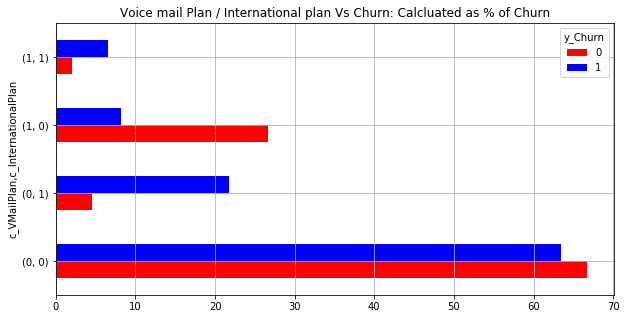

In [54]:
# For Churn -= True 85.2% dont have VM plan and 63.4% dont have IPlan
rcParams['figure.figsize'] =10,5
Crosstab_VMP_IP = pd.crosstab([df1.c_VMailPlan,df1.c_InternationalPlan], df1.y_Churn,normalize='columns').round(6)*100
print(Crosstab_VMP_IP)
Crosstab_VMP_IP.plot(kind='barh', stacked=False, color=['red','blue'], grid=True, title="Voice mail Plan / International plan Vs Churn: Calcluated as % of Churn")

# Voice Mail and Area Code Vs Churn

y_Churn                       0        1
c_VMailPlan c_AreaCode                  
0           0           18.3035  20.8841
            1           35.1426  42.0732
            2           17.7985  22.2561
1           0            6.8417   4.2683
            1           14.8700   6.4024
            2            7.0437   4.1159


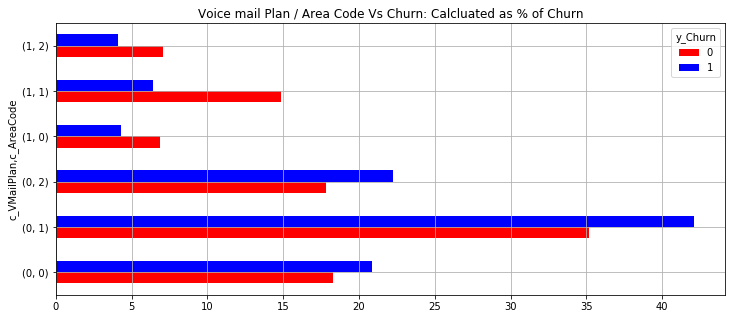

In [65]:
# For Churn = True; 42 % of churn is from area code 1 (415)
rcParams['figure.figsize'] =12,5
Crosstab_VMP_AC = pd.crosstab([df1.c_VMailPlan,df1.c_AreaCode], df1.y_Churn,normalize='columns').round(6)*100
print(Crosstab_VMP_AC)
Crosstab_VMP_AC.plot(kind='barh', stacked=False, color=['red','blue'],grid=True,title="Voice mail Plan / Area Code Vs Churn: Calcluated as % of Churn")

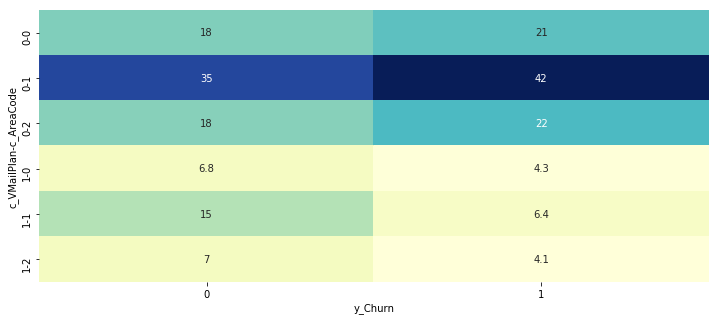

In [66]:
sb.heatmap(Crosstab_VMP_AC,cmap="YlGnBu", annot=True, cbar=False)

## Churn Vs Service calls

y_Churn                0        1
q_CustServCalls                  
0                21.0805  17.6829
1                37.2381  26.8293
2                23.2012  17.0732
3                13.9106   9.9085
4                 3.2820  15.8537
5                 0.8584   8.3841
6                 0.2525   2.7439
7                 0.1515   1.0671
8                 0.0252   0.1524
9                 0.0000   0.3049


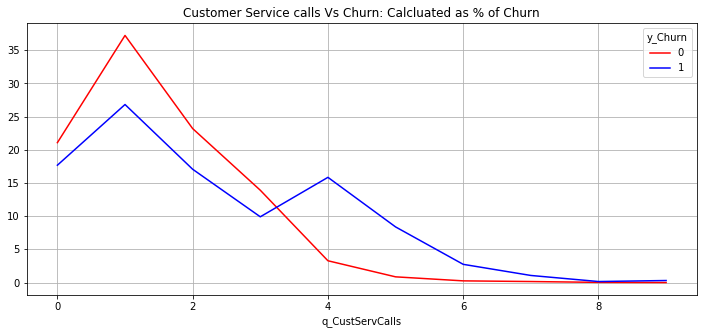

In [95]:
# After ~3 calls, the churn rate spikes up
rcParams['figure.figsize'] =12,5
Crosstab_CustSercalls = pd.crosstab(df1.q_CustServCalls, df1.y_Churn,normalize='columns').round(6)*100
print(Crosstab_CustSercalls)
Crosstab_CustSercalls.plot(kind='line', stacked=False, color=['red','blue'],grid=True,title="Customer Service calls Vs Churn: Calcluated as % of Churn")

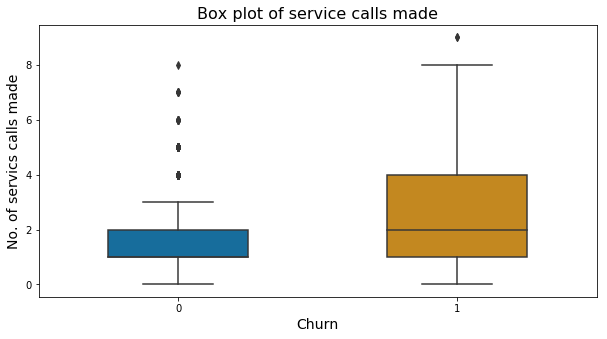

In [112]:
# Average Calls made by Churned people is much higher than stay
rcParams['figure.figsize'] =10,5

#df1.boxplot(['q_CustServCalls'],by='y_Churn',grid=True) OR

bplot = sb.boxplot(y='q_CustServCalls', x='y_Churn',data=df1,width=0.5,palette="colorblind")
bplot.axes.set_title("Box plot of service calls made",fontsize=16)
bplot.set_xlabel("Churn",fontsize=14)
bplot.set_ylabel("No. of servics calls made",fontsize=14)
bplot.tick_params(labelsize=10)

# output file name
# plot_file_name="boxplot_and_swarmplot_with_seaborn.jpg"
# save as jpeg
#bplot.figure.savefig(plot_file_name,format='jpeg',dpi=100)

# Calls made per account lenght days

In [82]:
# Create a new column and create bins
df1['q_CallPerAccountlengh'] = df1.q_CustServCalls/df1.q_AccountLength
custom_bucket_array = np.linspace(0, 5, 11)
df1['q_CallPerAccountlengh_bins'] = pd.cut(df1['q_CallPerAccountlengh'], custom_bucket_array)
Counter(df1['q_CallPerAccountlengh_bins'])

Counter({Interval(0.0, 0.5, closed='right'): 3650,
         nan: 951,
         Interval(0.5, 1.0, closed='right'): 11,
         Interval(1.0, 1.5, closed='right'): 2,
         Interval(4.5, 5.0, closed='right'): 1,
         Interval(1.5, 2.0, closed='right'): 1,
         Interval(2.5, 3.0, closed='right'): 1})

y_Churn                           0        1
q_CallPerAccountlengh_bins                  
(0.0, 0.5]                  99.5841  99.4444
(0.5, 1.0]                   0.2879   0.3704
(1.0, 1.5]                   0.0640   0.0000
(1.5, 2.0]                   0.0320   0.0000
(2.5, 3.0]                   0.0320   0.0000
(4.5, 5.0]                   0.0000   0.1852


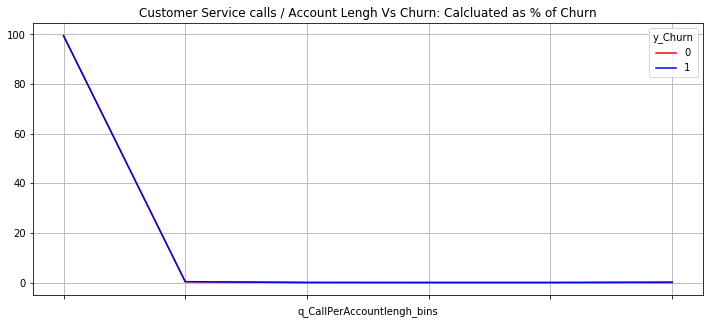

In [83]:
# Majority of the people never made any calls
rcParams['figure.figsize'] =12,5
Crosstab_CallPerAccountlengh = pd.crosstab(df1.q_CallPerAccountlengh_bins, df1.y_Churn,normalize='columns').round(6)*100
print(Crosstab_CallPerAccountlengh)
Crosstab_CallPerAccountlengh.plot(kind='line', stacked=False, color=['red','blue'],grid=True,title="Customer Service calls / Account Lengh Vs Churn: Calcluated as % of Churn")

## Usage Analysis - No Of Calls made

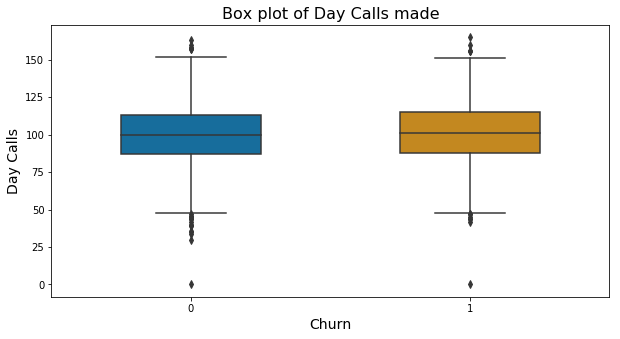

In [121]:
# No difference usage - no. of Day calls made
rcParams['figure.figsize'] =10,5

#df1.boxplot(['q_DayCalls'],by='y_Churn',grid=True) OR

bplot = sb.boxplot(y='q_DayCalls', x='y_Churn',data=df1,width=0.5,palette="colorblind")
bplot.axes.set_title("Box plot of Day Calls made",fontsize=16)
bplot.set_xlabel("Churn",fontsize=14)
bplot.set_ylabel("Day Calls",fontsize=14)
bplot.tick_params(labelsize=10)

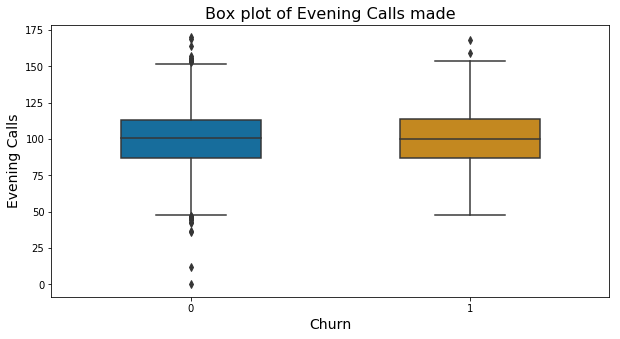

In [118]:
# No difference usage - no. of Evening calls made
rcParams['figure.figsize'] =10,5

#df1.boxplot(['q_EveCalls'],by='y_Churn',grid=True) OR

bplot = sb.boxplot(y='q_EveCalls', x='y_Churn',data=df1,width=0.5,palette="colorblind")
bplot.axes.set_title("Box plot of Evening Calls made",fontsize=16)
bplot.set_xlabel("Churn",fontsize=14)
bplot.set_ylabel("Evening Calls",fontsize=14)
bplot.tick_params(labelsize=10)

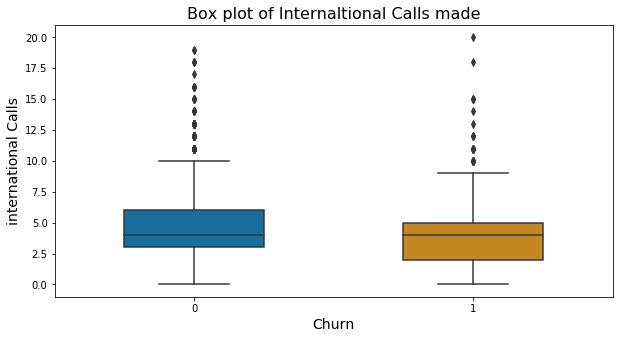

In [122]:
# No difference usage - no. of International calls made
rcParams['figure.figsize'] =10,5

#df1.boxplot(['q_Internationalcalls'],by='y_Churn',grid=True) OR

bplot = sb.boxplot(y='q_Internationalcalls', x='y_Churn',data=df1,width=0.5,palette="colorblind")
bplot.axes.set_title("Box plot of Internaltional Calls made",fontsize=16)
bplot.set_xlabel("Churn",fontsize=14)
bplot.set_ylabel("International Calls",fontsize=14)
bplot.tick_params(labelsize=10)

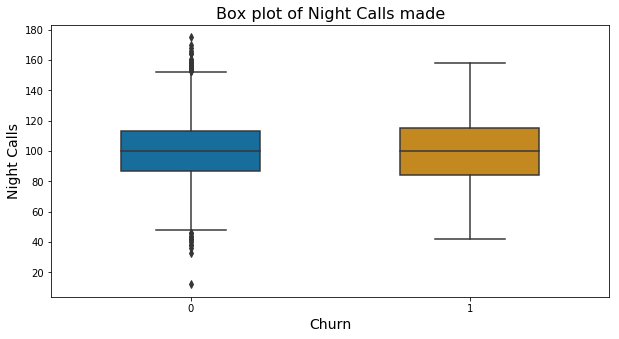

In [125]:
# No difference usage - no. of Night calls made
rcParams['figure.figsize'] =10,5

#df1.boxplot(['q_NightCalls'],by='y_Churn',grid=True) OR

bplot = sb.boxplot(y='q_NightCalls', x='y_Churn',data=df1,width=0.5,palette="colorblind")
bplot.axes.set_title("Box plot of Night Calls made",fontsize=16)
bplot.set_xlabel("Churn",fontsize=14)
bplot.set_ylabel("Night Calls",fontsize=14)
bplot.tick_params(labelsize=10)

##  Usage Analysis - Total  Minutes

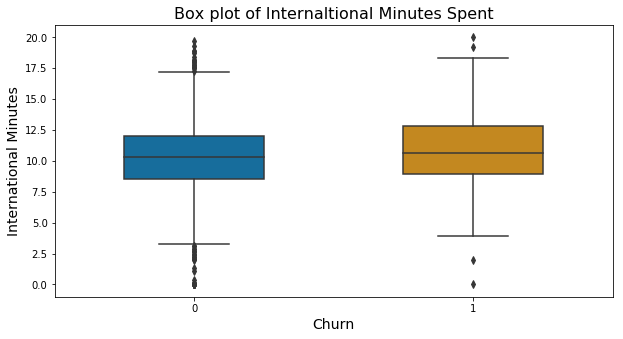

In [123]:
# No difference usage - no. of International Mins Spent
rcParams['figure.figsize'] =10,5

#df1.boxplot(['q_InternationalMins'],by='y_Churn',grid=True) OR

bplot = sb.boxplot(y='q_InternationalMins', x='y_Churn',data=df1,width=0.5,palette="colorblind")
bplot.axes.set_title("Box plot of Internaltional Minutes Spent",fontsize=16)
bplot.set_xlabel("Churn",fontsize=14)
bplot.set_ylabel("International Minutes",fontsize=14)
bplot.tick_params(labelsize=10)

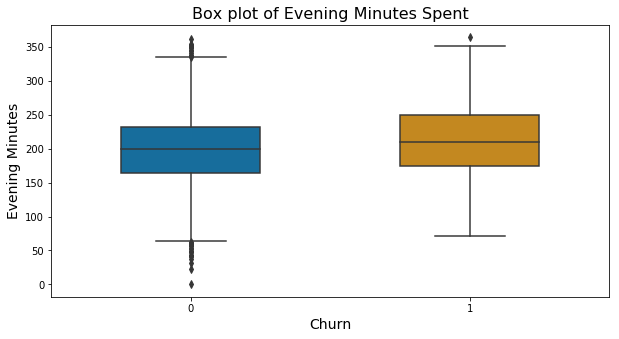

In [126]:
# No difference usage - no. of Evening Mins Spent
rcParams['figure.figsize'] =10,5

#df1.boxplot(['q_EveMins'],by='y_Churn',grid=True) OR

bplot = sb.boxplot(y='q_EveMins', x='y_Churn',data=df1,width=0.5,palette="colorblind")
bplot.axes.set_title("Box plot of Evening Minutes Spent",fontsize=16)
bplot.set_xlabel("Churn",fontsize=14)
bplot.set_ylabel("Evening Minutes",fontsize=14)
bplot.tick_params(labelsize=10)

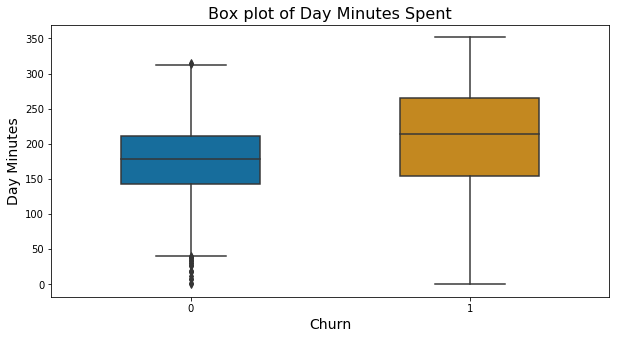

In [127]:
# No difference usage - no. of Day Mins Spent
rcParams['figure.figsize'] =10,5

#df1.boxplot(['q_DayMins'],by='y_Churn',grid=True) OR

bplot = sb.boxplot(y='q_DayMins', x='y_Churn',data=df1,width=0.5,palette="colorblind")
bplot.axes.set_title("Box plot of Day Minutes Spent",fontsize=16)
bplot.set_xlabel("Churn",fontsize=14)
bplot.set_ylabel("Day Minutes",fontsize=14)
bplot.tick_params(labelsize=10)

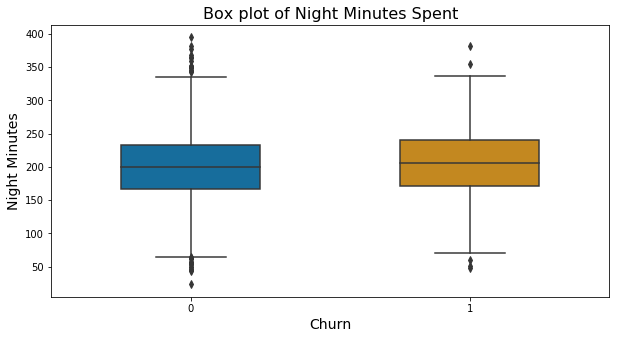

In [128]:
# No difference usage - no. of Night Mins Spent
rcParams['figure.figsize'] =10,5

#df1.boxplot(['q_NightMins'],by='y_Churn',grid=True) OR

bplot = sb.boxplot(y='q_NightMins', x='y_Churn',data=df1,width=0.5,palette="colorblind")
bplot.axes.set_title("Box plot of Night Minutes Spent",fontsize=16)
bplot.set_xlabel("Churn",fontsize=14)
bplot.set_ylabel("Night Minutes",fontsize=14)
bplot.tick_params(labelsize=10)

In [ ]:
# Masked after saving
df1.to_csv("OriginalImportedFile_enc_Normal_eda.csv",index=False)